In [11]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [12]:
tenda_rj = pd.read_csv('tenda_propostas_RJ.csv',sep=';',decimal = ',')

In [13]:
tenda_rj.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [14]:
tenda_rj.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO168923N6K9S2200046,156700.0,2250.0,0.0
1,PRO169451T5N0Q1117181,130980.0,2250.0,0.0
2,PRO17072401487346421,123375.2,4134.5,0.0
3,PRO17081003959345907,145541.7,2403.7,0.0
4,PRO17081604826345384,162800.4,2117.5,13427.5


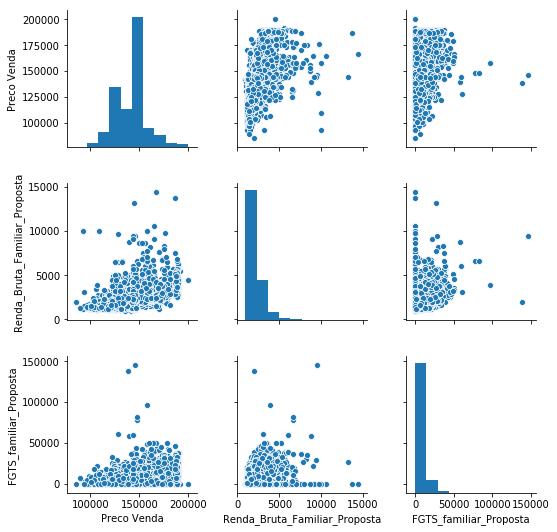

In [16]:
sb.pairplot(tenda_rj)

In [17]:
tenda_drop_rj = tenda_rj.drop(['Chave unica'],axis = 1)
tenda_drop_rj

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,156700.0,2250.0,0.0
1,130980.0,2250.0,0.0
2,123375.2,4134.5,0.0
3,145541.7,2403.7,0.0
4,162800.4,2117.5,13427.5
5,135000.0,1732.6,8326.8
6,153008.0,2149.2,8559.0
7,107746.4,2786.0,14953.7
8,145827.0,3500.0,2670.7
9,136000.0,1885.1,3570.7


K_MEANS (RS)

In [18]:
from sklearn.cluster import KMeans

In [19]:
sb.set_style('darkgrid')

In [20]:
wcss = []

1 1910129287463.7192
2 985341428158.1682
3 575277826606.1371
4 465971919623.0812
5 390122004742.83044
6 331808490166.57513
7 295578840306.2531
8 247200202749.6919
9 224126454914.06934


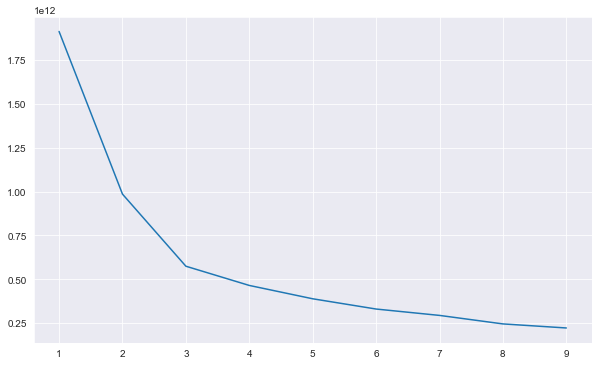

In [22]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_rj)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [23]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [24]:
kmeans.fit(tenda_drop_rj)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [25]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

CLASSES CRIADAS 

In [26]:
tenda_rj['Kclasses'] = kmeans.labels_

In [27]:
tenda_rj. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO168923N6K9S2200046,156700.0,2250.0,0.0,1
1,PRO169451T5N0Q1117181,130980.0,2250.0,0.0,0
2,PRO17072401487346421,123375.2,4134.5,0.0,0
3,PRO17081003959345907,145541.7,2403.7,0.0,1
4,PRO17081604826345384,162800.4,2117.5,13427.5,2
5,PRO17082105633346184,135000.0,1732.6,8326.8,1
6,PRO17100211600345992,153008.0,2149.2,8559.0,1
7,PRO17102314607345993,107746.4,2786.0,14953.7,0
8,PRO210600G0Q0L0345766,145827.0,3500.0,2670.7,1
9,PRO211527S7S4L2331844,136000.0,1885.1,3570.7,1


In [28]:
tenda_rj['Kclasses'] = kmeans.labels_

In [29]:
tenda_rj.Kclasses.value_counts()

1    3630
0    2050
2     762
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [30]:
tenda_rj.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,6442.00,6442.00,6442.00,6442.00
mean,140725.35,2146.67,6181.63,0.80
std,15425.44,927.96,7599.52,0.63
min,85100.00,951.00,0.00,0.00
25%,129267.32,1599.35,494.90,0.00
50%,144000.00,1912.90,4271.25,1.00
75%,146300.00,2370.07,8750.40,1.00
max,200000.00,14397.80,145354.60,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


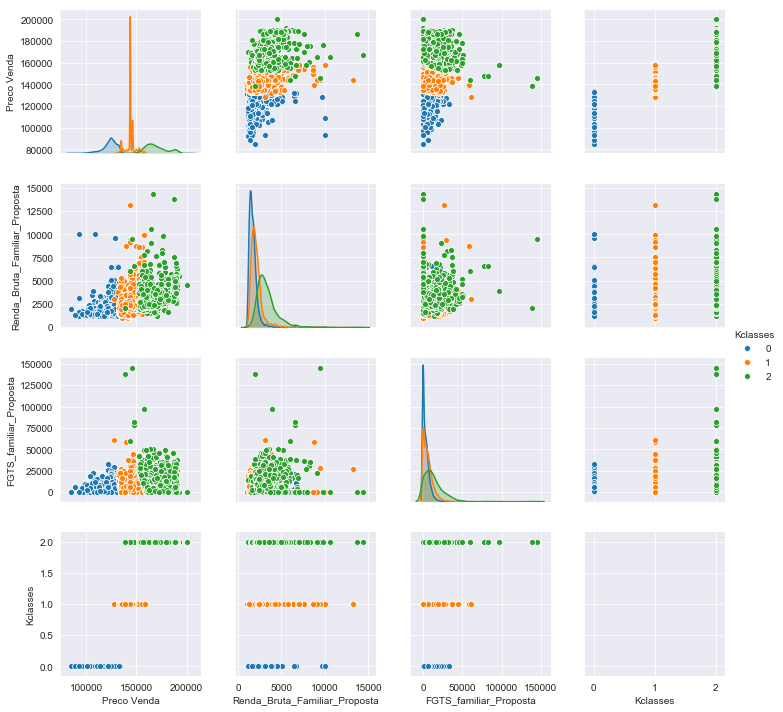

In [31]:
sb.pairplot(tenda_rj,hue='Kclasses')

EXPORTANDO DADOS

In [33]:
tenda_rj.to_csv('clustertenda_RJ.csv',sep=';',decimal=',')